In [85]:
# from google.colab import drive
# drive.mount('/content/drive')

In [86]:
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras import layers
import keras.layers
import cv2
import os
from sklearn.model_selection import train_test_split
# from skimage.io import imread

In [87]:
#initializing the cnn
model=Sequential()

In [88]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [89]:
# Creating training set
# training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Training-validation/',
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Training-validation/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 classes=['Myringosclerosis', 'Normal'] )
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            classes=['Myringosclerosis', 'Normal'] )


Found 360 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [90]:
training_set.class_indices

{'Myringosclerosis': 0, 'Normal': 1}

In [91]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
inputs = keras.Input((64, 64, 3))
x = keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = output)

In [93]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [94]:
print(model.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 256)       7168      
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                     

In [95]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/tympanic_membrane_dataset_2-20230529T085148Z-001/tympanic_membrane_dataset_2/Copy of binery.hdf5')

In [96]:
history = model.fit(training_set , epochs = 200 , validation_data=(test_set))
# 200 epochs to get best fit model

Epoch 1/200
12/12 [==============================] - 18s 1s/step - loss: 0.7073 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/200
12/12 [==============================] - 16s 1s/step - loss: 0.6868 - accuracy: 0.5222 - val_loss: 0.6820 - val_accuracy: 0.6000
Epoch 3/200
12/12 [==============================] - 16s 1s/step - loss: 0.6719 - accuracy: 0.5667 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 4/200
12/12 [==============================] - 15s 1s/step - loss: 0.6910 - accuracy: 0.5194 - val_loss: 0.6824 - val_accuracy: 0.5250
Epoch 5/200
12/12 [==============================] - 15s 1s/step - loss: 0.6328 - accuracy: 0.6778 - val_loss: 0.7101 - val_accuracy: 0.4875
Epoch 6/200
12/12 [==============================] - 15s 1s/step - loss: 0.6817 - accuracy: 0.5806 - val_loss: 0.6991 - val_accuracy: 0.5125
Epoch 7/200
12/12 [==============================] - 15s 1s/step - loss: 0.6322 - accuracy: 0.6639 - val_loss: 0.6802 - val_accuracy: 0.5750
Epoch 8/200
1

In [97]:
model.save('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/binary_classification.hdf5')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from keras.utils import plot_model

# Assuming you have already loaded your Keras model
# model = load_model('your_model.h5')

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


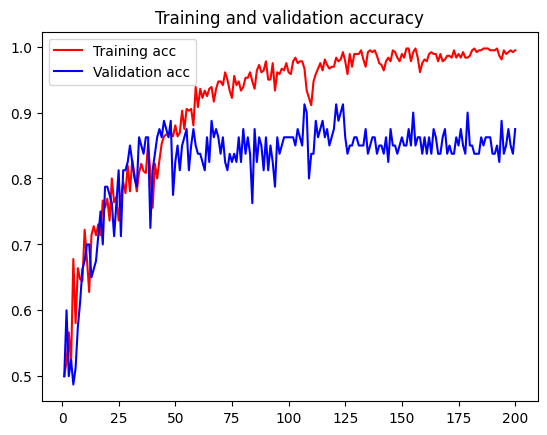

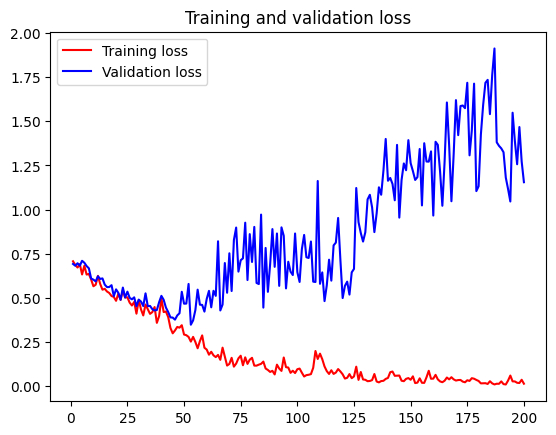

In [99]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

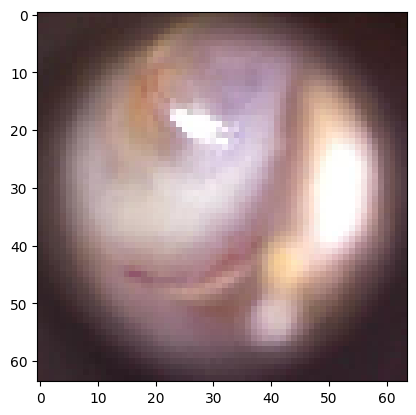

1/1 [==============================] - 0s 51ms/step
mi1.jpg
abnormal


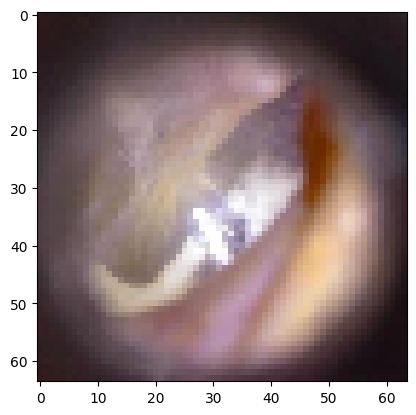

1/1 [==============================] - 0s 41ms/step
mi10.jpg
normal


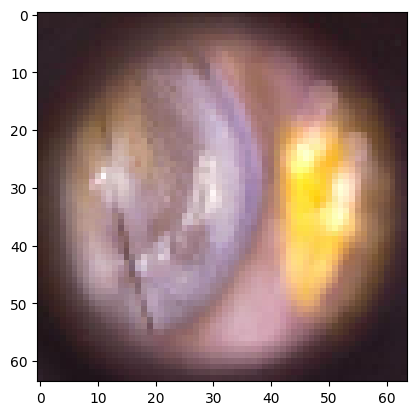

1/1 [==============================] - 0s 41ms/step
mi11.jpg
normal


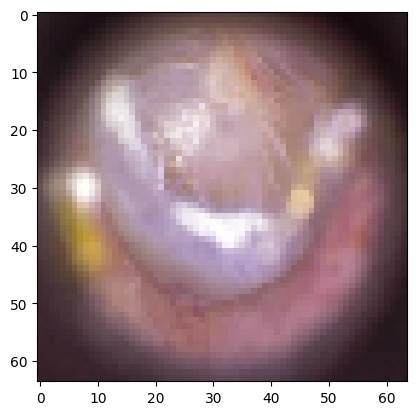

1/1 [==============================] - 0s 39ms/step
mi12.jpg
abnormal


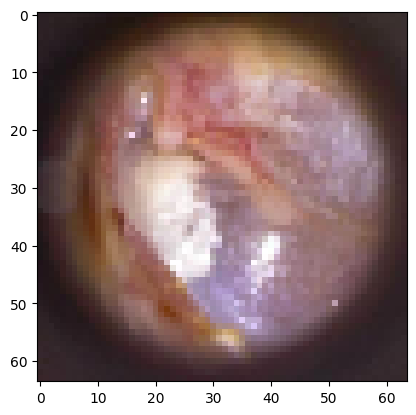

1/1 [==============================] - 0s 51ms/step
mi13.jpg
abnormal


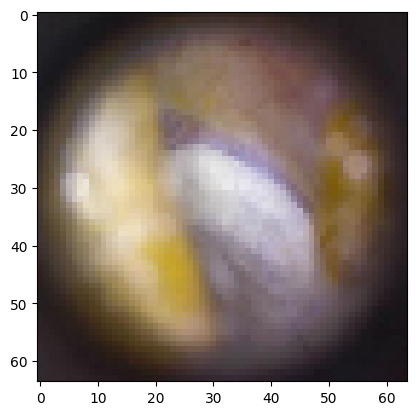

1/1 [==============================] - 0s 43ms/step
mi14.jpg
abnormal


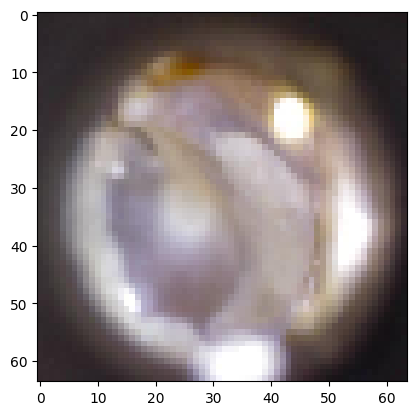

1/1 [==============================] - 0s 38ms/step
mi15.jpg
abnormal


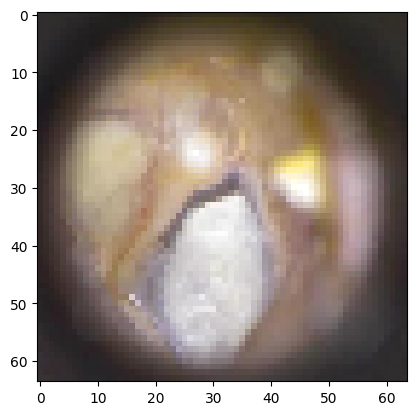

1/1 [==============================] - 0s 42ms/step
mi16.jpg
abnormal


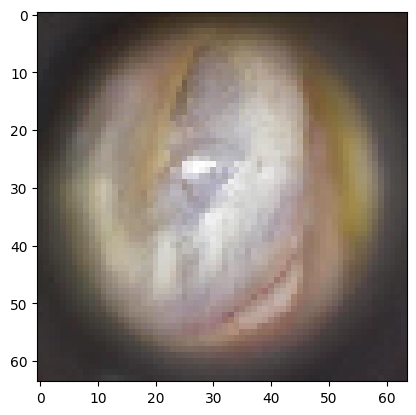

1/1 [==============================] - 0s 33ms/step
mi17.jpg
abnormal


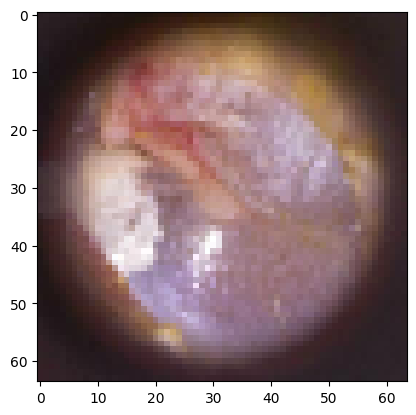

1/1 [==============================] - 0s 38ms/step
mi18.jpg
abnormal


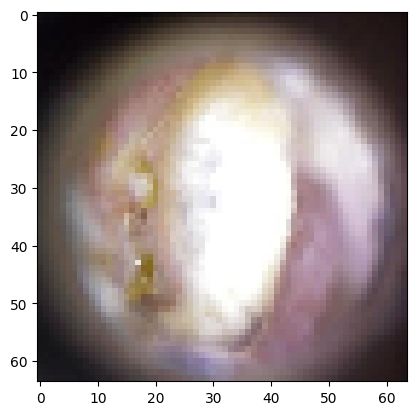

1/1 [==============================] - 0s 27ms/step
mi19.jpg
abnormal


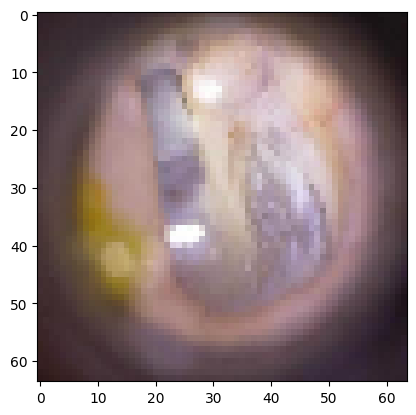

1/1 [==============================] - 0s 47ms/step
mi2.jpg
abnormal


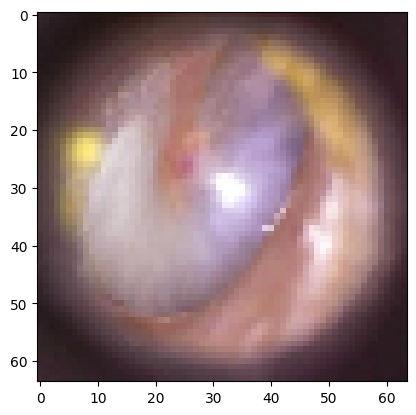

1/1 [==============================] - 0s 42ms/step
mi20.jpg
abnormal


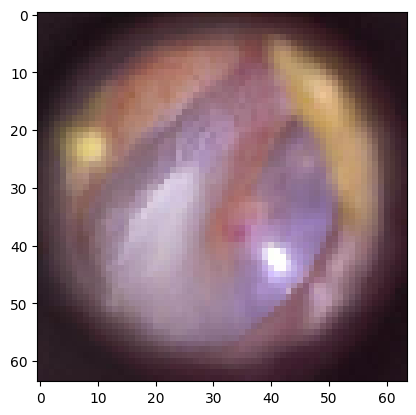

1/1 [==============================] - 0s 40ms/step
mi21.jpg
abnormal


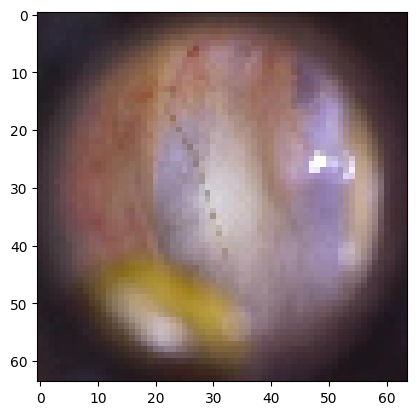

1/1 [==============================] - 0s 50ms/step
mi22.jpg
abnormal


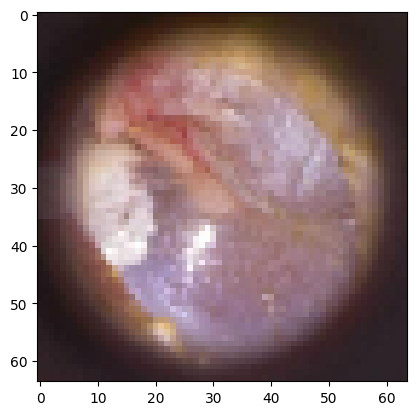

1/1 [==============================] - 0s 33ms/step
mi23.jpg
abnormal


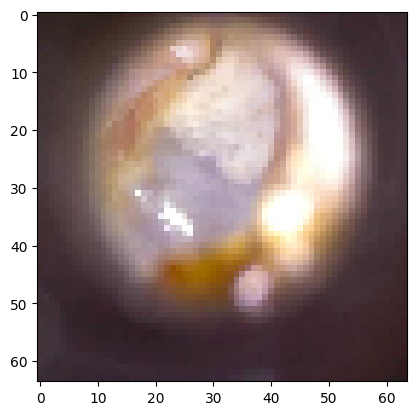

1/1 [==============================] - 0s 36ms/step
mi24.jpg
abnormal


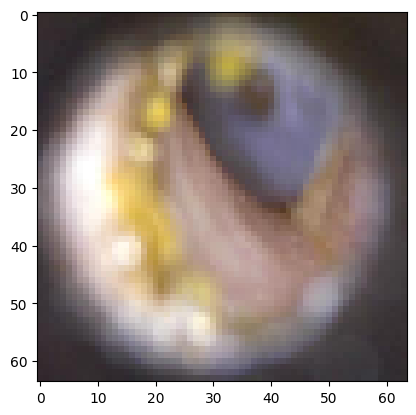

1/1 [==============================] - 0s 48ms/step
mi25.jpg
normal


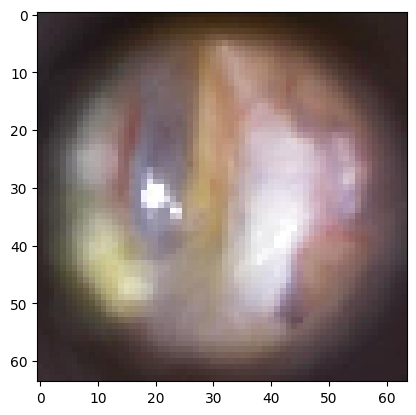

1/1 [==============================] - 0s 42ms/step
mi26.jpg
abnormal


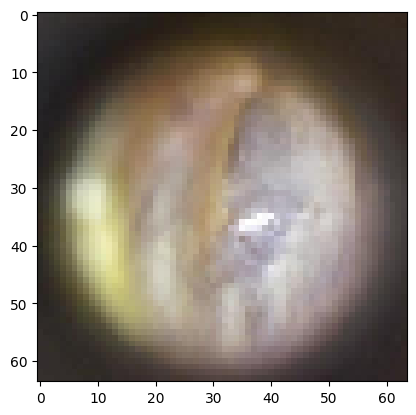

1/1 [==============================] - 0s 42ms/step
mi27.jpg
abnormal


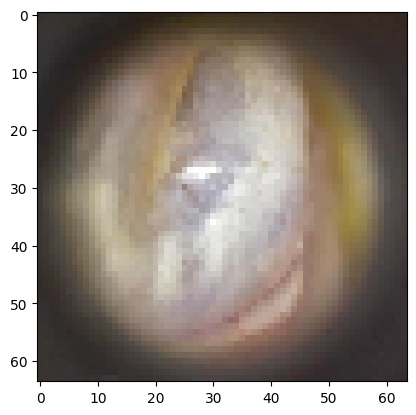

1/1 [==============================] - 0s 45ms/step
mi28.jpg
abnormal


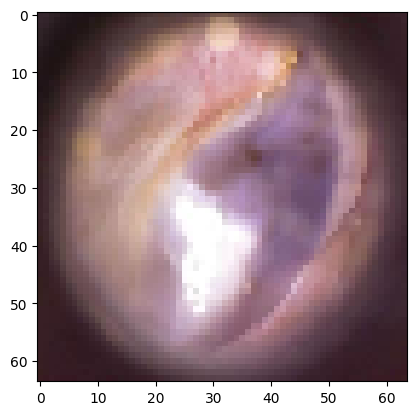

1/1 [==============================] - 0s 49ms/step
mi29.jpg
normal


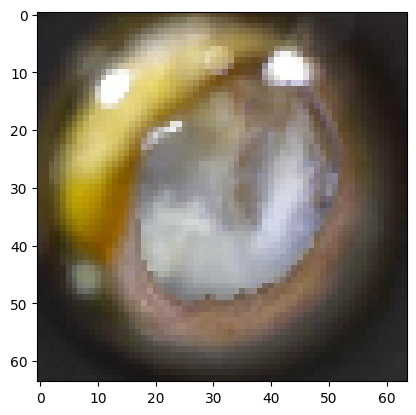

1/1 [==============================] - 0s 40ms/step
mi3.jpg
abnormal


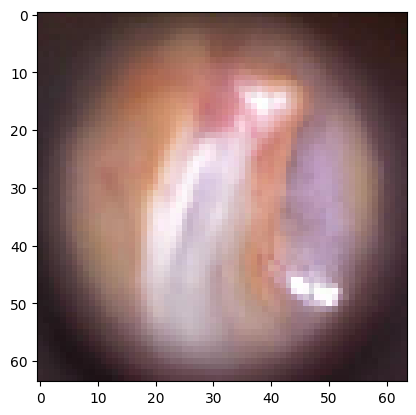

1/1 [==============================] - 0s 37ms/step
mi30.jpg
normal


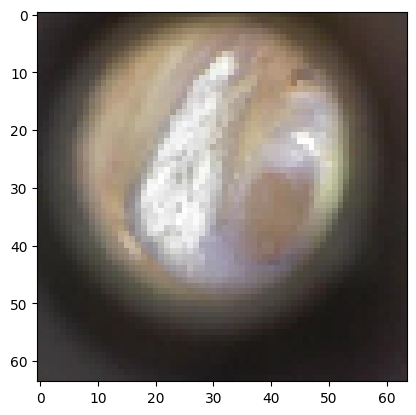

1/1 [==============================] - 0s 43ms/step
mi31.jpg
abnormal


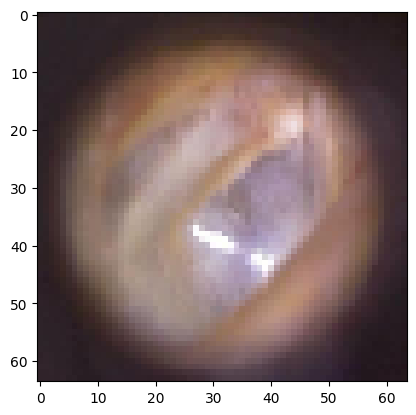

1/1 [==============================] - 0s 49ms/step
mi32.jpg
abnormal


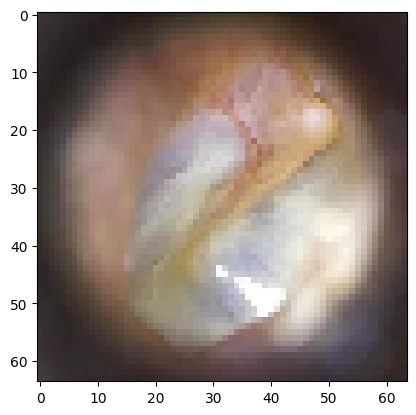

1/1 [==============================] - 0s 40ms/step
mi33.jpg
abnormal


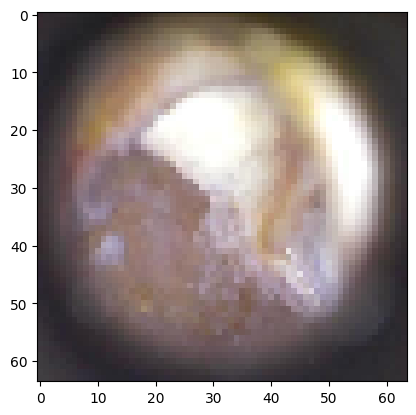

1/1 [==============================] - 0s 40ms/step
mi34.jpg
abnormal


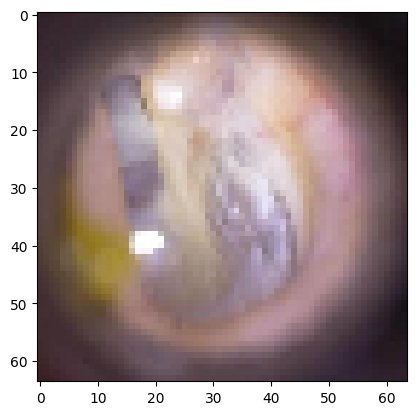

1/1 [==============================] - 0s 38ms/step
mi35.jpg
abnormal


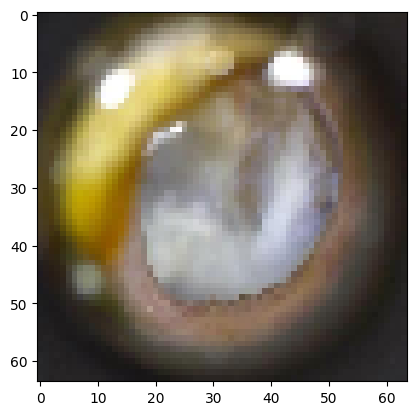

1/1 [==============================] - 0s 40ms/step
mi36.jpg
abnormal


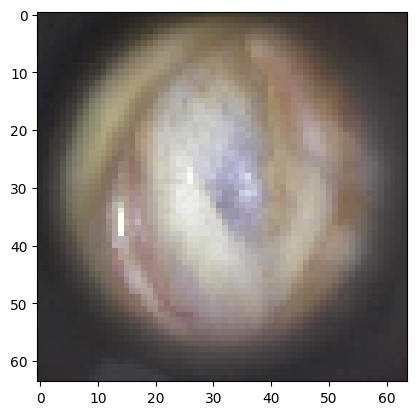

1/1 [==============================] - 0s 40ms/step
mi37.jpg
abnormal


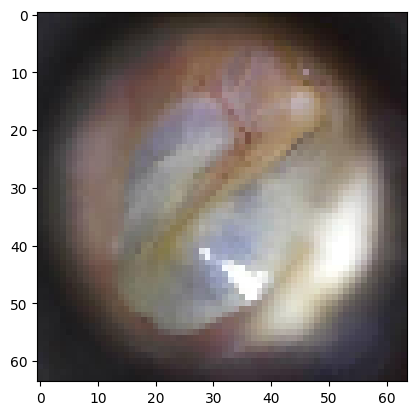

1/1 [==============================] - 0s 37ms/step
mi38.jpg
abnormal


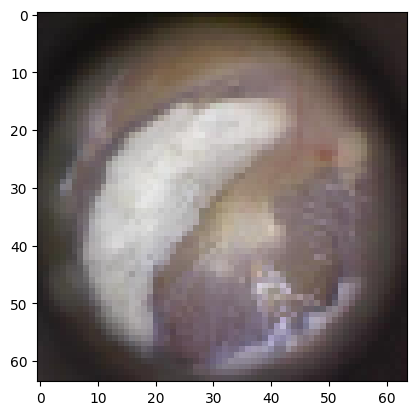

1/1 [==============================] - 0s 39ms/step
mi39.jpg
abnormal


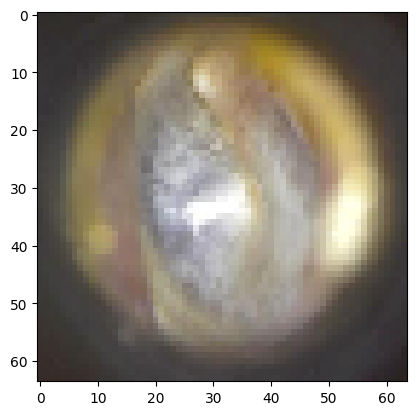

1/1 [==============================] - 0s 69ms/step
mi4.jpg
abnormal


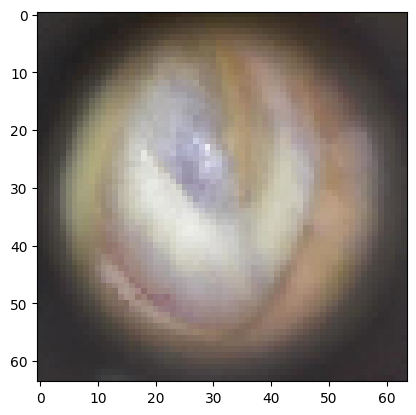

1/1 [==============================] - 0s 34ms/step
mi40.jpg
abnormal


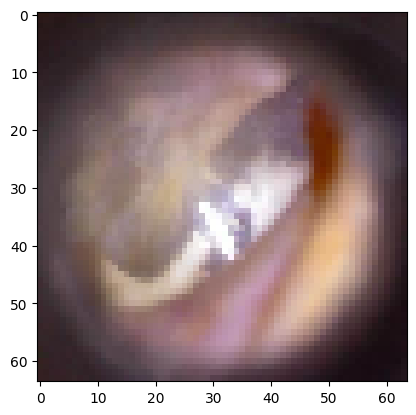

1/1 [==============================] - 0s 53ms/step
mi5.jpg
normal


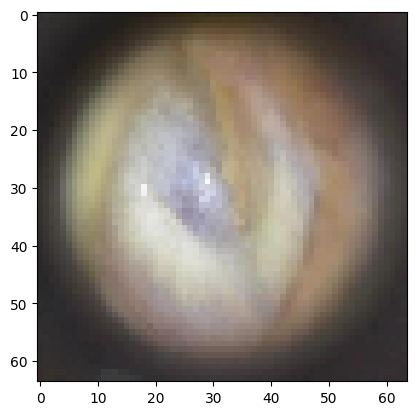

1/1 [==============================] - 0s 78ms/step
mi6.jpg
abnormal


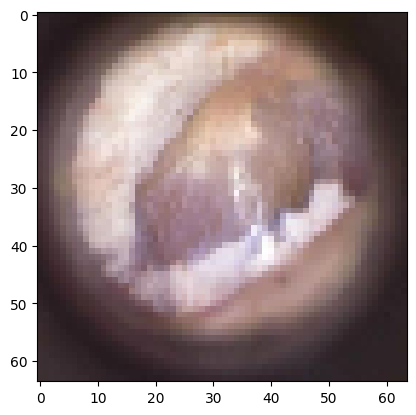

1/1 [==============================] - 0s 48ms/step
mi7.jpg
abnormal


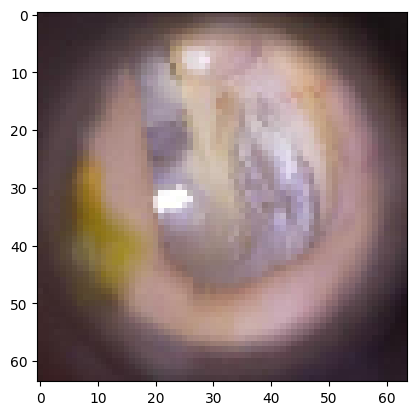

1/1 [==============================] - 0s 36ms/step
mi8.jpg
abnormal


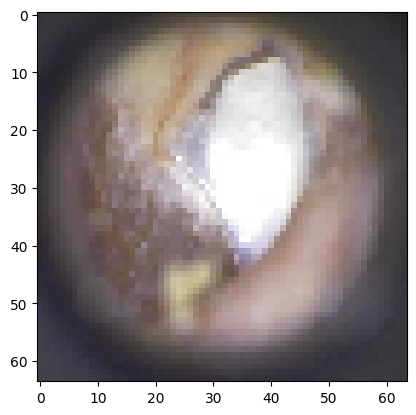

1/1 [==============================] - 0s 49ms/step
mi9.jpg
abnormal


In [103]:
# dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing/Earwax plug'
dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing/Myringosclerosis'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)
  if val == 0:
    print("abnormal")
  else:
    print("normal")






